In [1]:
from FF_Helpers import *

$x = f(\theta_s,\theta_e) = 33cos(\theta_s+\theta_e)+30cos(\theta_s)$

$y = g(\theta_s,\theta_e) = 33sin(\theta_s+\theta_e)+30sin(\theta_s)$

$\ddot{x} = \frac{\partial^2 f}{\partial \theta_s^2}\dot{\theta}_s^2 +$ $2\frac{\partial^2 f}{\partial \theta_s \partial \theta_e}\dot{\theta}_s$ 
$\dot{\theta}_e$
$ + \frac{\partial^2 f}{\partial \theta_e^2}\dot{\theta}_e^2$
 $+ \frac{\partial f}{\partial \theta_s}\ddot{\theta}_s$
 $ + \frac{\partial f}{\partial \theta_e}\ddot{\theta}_e$

 $\ddot{y} = \frac{\partial^2 g}{\partial \theta_s^2}\dot{\theta}_s^2 +$ $2\frac{\partial^2 g}{\partial \theta_s \partial \theta_e}\dot{\theta}_s$ 
$\dot{\theta}_e$
$ + \frac{\partial^2 g}{\partial \theta_e^2}\dot{\theta}_e^2$
 $+ \frac{\partial g}{\partial \theta_s}\ddot{\theta}_s$
 $ + \frac{\partial g}{\partial \theta_e}\ddot{\theta}_e$

$\gamma = \ddot{x} - \frac{\partial^2 f}{\partial \theta_s^2}\dot{\theta}_s^2 -2\frac{\partial^2 f}{\partial \theta_s \partial \theta_e}\dot{\theta}_s\dot{\theta}_e- \frac{\partial^2 f}{\partial \theta_e^2}\dot{\theta}_e^2$

 $\nu = \ddot{y} - \frac{\partial^2 g}{\partial \theta_s^2}\dot{\theta}_s^2 - 2\frac{\partial^2 g}{\partial \theta_s \partial \theta_e}\dot{\theta}_s \dot{\theta}_e - \frac{\partial^2 g}{\partial \theta_e^2}\dot{\theta}_e^2 $




$\ddot{\theta}_s = \frac{\frac{\partial f}{\partial \theta_e}\nu - \frac{\partial g}{\partial \theta_e}\gamma}{\frac{\partial f}{\partial \theta_e}\frac{\partial g}{\partial \theta_s} + \frac{\partial f}{\partial \theta_s}} $

$\ddot{\theta}_e = \frac{\frac{\partial g}{\partial \theta_s}\gamma - \frac{\partial f}{\partial \theta_s}\nu}{\frac{\partial g}{\partial \theta_s}\frac{\partial f}{\partial \theta_e} + \frac{\partial g}{\partial \theta_e}} $

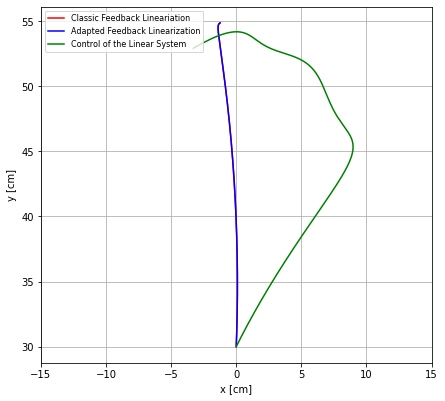

In [12]:
plt.figure(figsize=(7,11))

Simulation_FF(1e7,1e7,100,100,0,1e-6,1e-6,0,proportionnality = 0.5,pert = 100)
Simulation_FF(1e7,1e7,100,100,0,1e-6,1e-6,1,proportionnality = 0.5,pert = 100)
Simulation_FF_Linear(1e8,1e8,1000,1000,1e-5,1e-5,proportionnality = 0.5,pert = 2)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')     
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.grid()
plt.xlim((-15,15))
plt.legend(fontsize = 8,loc = "upper left")

METHOD : 

1. Determine k from F = kydot
2. Determine for a range of y the error evolution , attention tous les mouvements ne prennent pas le même temps!
3. 

(0.0, 1.2699999809265137)

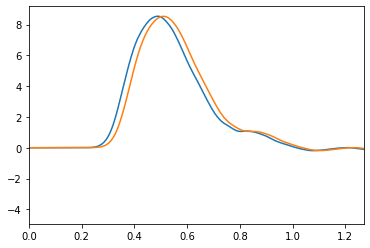

In [4]:
data = loadmat("Data/XP1/F12_data.mat")["F12_data"][0]
trial = 220
plt.plot(data[trial]["Right_FS_TimeStamp"].flatten()-data[trial]["Right_FS_TimeStamp"][0]-data[trial]["EVENTS"]["TIMES"][0,0][0,1],(data[trial]["Right_HandYVel"]).flatten()*13)
plt.plot(data[trial]["Right_FS_TimeStamp"].flatten()-data[trial]["Right_FS_TimeStamp"][0]-data[trial]["EVENTS"]["TIMES"][0,0][0,1],(data[trial]["Right_Hand_ForceCMD_X"]).flatten())
plt.xlim(0,data[trial]["EVENTS"]["TIMES"][0,0][0,5]-data[trial]["EVENTS"]["TIMES"][0,0][0,1])


0.0 1.5245259272869354 29.5 46.0


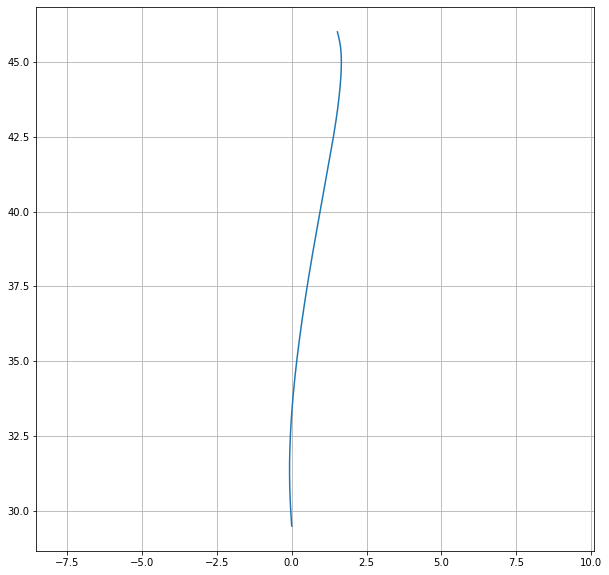

In [33]:
plt.figure(figsize = (10,10))
plt.grid()
Average_Curve(data,trial)

On part en x = 9, y = 9 et on arrive en x = 10.3, y = 26.5

### Computation of Optimal Proportional Factors

In [2]:
ACTIVATION = True

Optimization = Optimal_Factors(ACTIVATION)

0.37750000000000006
0.34750000000000003
0.5
0.47250000000000003
0.43000000000000005
0.44500000000000006
0.37
0.2
0.4225
0.4075
0.2825
0.5


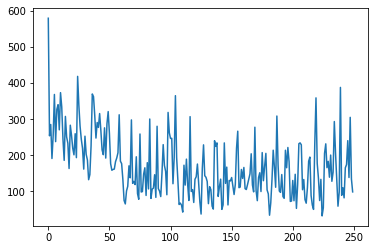

In [4]:
Compute_Mean_Error()


0
50
100
150
200


C:\Users\talex\AppData\Local\Temp\ipykernel_24380\3462249734.py:43: RuntimeWarning: Mean of empty slice
  plt.plot(np.arange(0,250),np.nanmean(Alphas,axis = 0))


TypeError: write() argument must be str, not numpy.ndarray

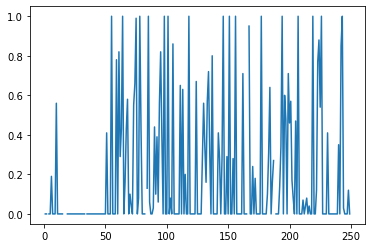

In [7]:
def Compute_Alphab():
    TOTAL_SUBJ = 12
    Alphas = np.zeros((TOTAL_SUBJ,250))
    for subj in range(1,TOTAL_SUBJ+1):
        data = loadmat("Data/XP1/F"+str(subj)+"_data.mat")["F"+str(subj)+"_data"][0]
        for trial in range(250):
                min_e = np.infty
                min_a = -1
                if Valid_Trial(data,trial):
                    Xdata = preprocess(data,trial,N = 100)[0]
                    for alpha in np.linspace(0,1,100):
                        X,Y = Simulation_FF(1e7,1e7,100,100,0,1e-6,1e-6,alpha = alpha,starting_point= [0,9.4+DEVIATION],targets = [Xdata[-1],26.1+DEVIATION],proportionnality=OPTIMAL_FACTORS[subj-1],plot = False,pert = ONSET_PERTURBATION)
                        x_interp = interp1d( Y,X)
                        Y = np.linspace(9.5+DEVIATION,26+DEVIATION,100)
                        Xref = x_interp(Y)
                        for best_alpha in range(101):
                            e = Compute_deviation(Xdata,Xref)
                            if e < min_e :
                                min_e = e
                                min_a = best_alpha/100
                        Alphas[subj-1,trial] = min_a
                else:
                    Alphas[subj-1,trial] = nan
        #Better_Error_Array = np.zeros(250-length)
        #Total_Better_Array[subj-1] = Better_Error_Array
    plt.plot(np.arange(0,250),np.nanmean(Alphas,axis = 0))
    plt.xlabel = "Trials"
    plt.ylabel = "Alpha"

Compute_Alphab()

In [ ]:
def Compute_Alphab():
    TOTAL_SUBJ = 1
    Alphas = np.zeros((TOTAL_SUBJ,250))
    for subj in range(1,TOTAL_SUBJ+1):
        data = loadmat("Data/XP1/F"+str(subj)+"_data.mat")["F"+str(subj)+"_data"][0]
        for trial in range(250):
                if trial%50 == 0: print(trial)
                if Valid_Trial(data,trial):
                    Xdata = preprocess(data,trial,N = 100)[0]
                    alpha = 0.5
                    X,Y = Simulation_FF(1e7,1e7,100,100,0,1e-6,1e-6,alpha = 0.5,starting_point= [0,9.3+DEVIATION],targets = [Xdata[-1],26.2+DEVIATION],proportionnality=OPTIMAL_FACTORS[subj-1],plot = False,pert = ONSET_PERTURBATION)
                    x_interp = interp1d( Y,X)
                    Y = np.linspace(9.5+DEVIATION,26+DEVIATION,100)
                    Xref = x_interp(Y)
                    e = Compute_deviation(Xdata,Xref)
                    delta = 0.32
                    for _ in range(6):
                        X,Y = Simulation_FF(1e7,1e7,100,100,0,1e-6,1e-6,alpha = max(alpha-delta,0),starting_point= [0,9.3+DEVIATION],targets = [Xdata[-1],26.2+DEVIATION],proportionnality=OPTIMAL_FACTORS[subj-1],plot = False,pert = ONSET_PERTURBATION)
                        x_interp = interp1d( Y,X)
                        Y = np.linspace(9.5+DEVIATION,26+DEVIATION,100)
                        Xref = x_interp(Y)
                        eminus = Compute_deviation(Xdata,Xref)
                        X,Y = Simulation_FF(1e7,1e7,100,100,0,1e-6,1e-6,alpha = min(alpha+delta,1),starting_point= [0,9.3+DEVIATION],targets = [Xdata[-1],26.2+DEVIATION],proportionnality=OPTIMAL_FACTORS[subj-1],plot = False,pert = ONSET_PERTURBATION)
                        x_interp = interp1d( Y,X)
                        Y = np.linspace(9.5+DEVIATION,26+DEVIATION,100)
                        Xref = x_interp(Y)
                        eplus = Compute_deviation(Xdata,Xref)
                        if eplus < eminus and eplus < e:
                             alpha = min(alpha+delta,1)
                             e = eplus
                             delta/=2
                        elif eminus < eplus and eminus < e:
                            alpha = max(alpha-delta,0)
                            delta/=2
                            e = eminus
                        else :
                             delta/=2
                    Alphas[subj-1,trial] = alpha
                else:
                    Alphas[subj-1,trial] = nan
        #Better_Error_Array = np.zeros(250-length)
        #Total_Better_Array[subj-1] = Better_Error_Array
    plt.plot(np.arange(0,250),np.nanmean(Alphas,axis = 0))
    plt.xlabel = "Trials"
    plt.ylabel = "Alpha"

Compute_Alphab()

In [7]:
plt.figure(figsize=(10,6))
Compute_Alpha()
plt.xlabel = "Trials"
plt.ylabel = "$\alpha$"

KeyboardInterrupt: 

<Figure size 720x432 with 0 Axes>

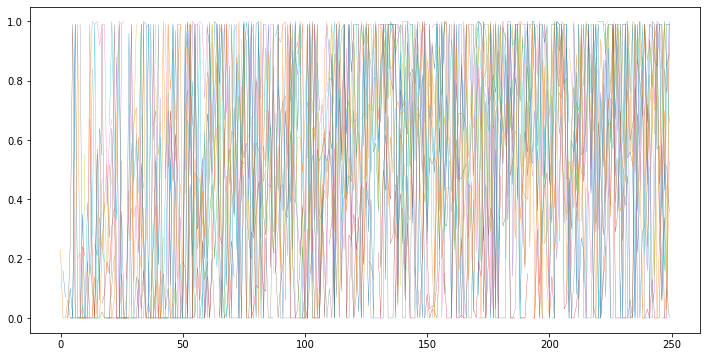

In [5]:
def Compute_Alpha_per_subj():
    plt.figure(figsize= (12,6))
    TOTAL_SUBJ = 12
    Alphas = np.zeros((TOTAL_SUBJ,250))
    for subj in range(1,TOTAL_SUBJ+1):
        data = loadmat("Data/XP1/F"+str(subj)+"_data.mat")["F"+str(subj)+"_data"][0]
        Big_X = np.zeros((101,100))
        for alpha in np.linspace(0,1,100):
            X,Y = Simulation_FF(1e7,1e7,100,100,0,1e-6,1e-6,alpha = alpha,starting_point= [0,9.4+DEVIATION],targets = [1,26.1+DEVIATION],proportionnality=OPTIMAL_FACTORS[subj-1],plot = False,pert = ONSET_PERTURBATION)
            x_interp = interp1d( Y,X)
            Y = np.linspace(9.5+DEVIATION,26+DEVIATION,100)
            Xref = x_interp(Y)
            Big_X[int(alpha*100)] = Xref
        for trial in range(250):
            min_e = np.infty
            min_a = -1
            if Valid_Trial(data,trial):
                for best_alpha in range(101):
                    e = Compute_deviation(preprocess(data,trial,N = 100)[0],Big_X[best_alpha])
                    if e < min_e :
                        min_e = e
                        min_a = best_alpha/100
                Alphas[subj-1,trial] = min_a
            else:
                Alphas[subj-1,trial] = nan
        #Better_Error_Array = np.zeros(250-length)
        #Total_Better_Array[subj-1] = Better_Error_Array
        plt.plot(np.arange(0,250),Alphas[subj-1],linewidth = .3)
    plt.xlabel = "Trials"
    plt.ylabel = "Alpha"

Compute_Alpha_per_subj()

Resampling Illustration

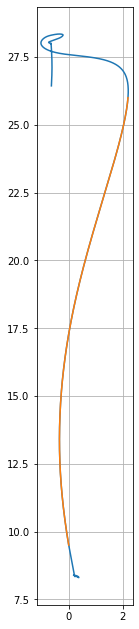

In [3]:
Resampling_Illustration()

20.196341933561694


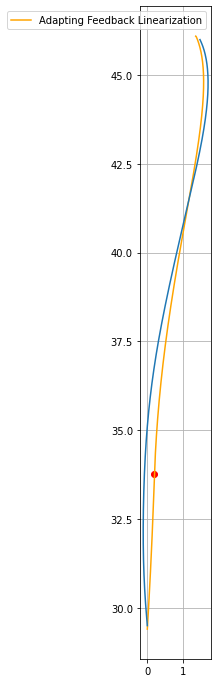

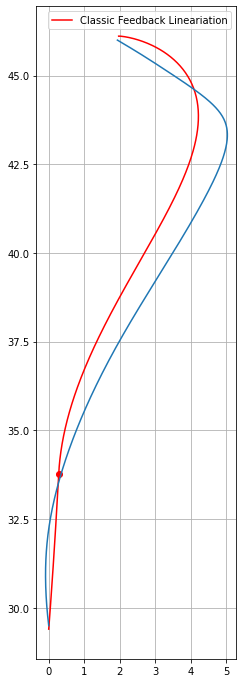

In [47]:
#Alpha = 0.84
plt.figure(figsize = (10,12))



trial = 220
data = loadmat("Data/XP1/F12_data.mat")["F12_data"][0]
Xdata,Ydata,t,thetas,thetae,load = preprocess(data,trial,N = 600)

factor = OPTIMAL_FACTORS[11]
X,Y = Simulation_FF(1e7,1e7,1000,1000,0,1e-6,1e-6,0.79,starting_point= [0,29.4],targets = [Xdata[-1],46.2],proportionnality=factor,plot = True,pert = 33.75)
x_interp = interp1d( Y,X)
Y = np.linspace(9.5+DEVIATION,26+DEVIATION,600)
Xref = x_interp(Y)
print(Compute_deviation(Xdata,Xref))


plt.plot(Xdata,Ydata)
plt.axis("equal")

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
            
plt.xlabel ="x [cm]"
plt.ylabel = "y [cm]"
plt.grid()
plt.legend()
plt.show()

#Alpha = 0.2

plt.figure(figsize = (10,12))

trial = 5
data = loadmat("Data/XP1/F12_data.mat")["F12_data"][0]
Xdata,Ydata,t,thetas,thetae,load = preprocess(data,trial,N = 600)
factor = OPTIMAL_FACTORS[11]
X,Y = Simulation_FF(1e7,1e7,1000,1000,0,1e-6,1e-6,0,starting_point= [0,29.4],targets = [Xdata[-1],46.1],proportionnality=factor,plot = True,pert = 33.75)
x_interp = interp1d( Y,X)
Y = np.linspace(9.5+DEVIATION,26+DEVIATION,600)
Xref = x_interp(Y)
plt.plot(Xdata,Ydata)
plt.axis("equal")

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
            
plt.xlabel ="x [cm]"
plt.ylabel = "y [cm]"
plt.grid()
plt.legend()

12.176297531939738


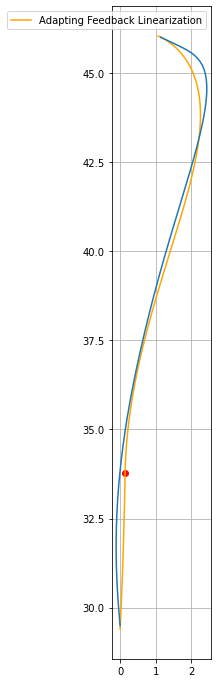

In [29]:
plt.figure(figsize = (10,12))

trial = 117
data = loadmat("Data/XP1/F12_data.mat")["F12_data"][0]
Xdata,Ydata,t,thetas,thetae,load = preprocess(data,trial,N = 600)
factor = OPTIMAL_FACTORS[11]
X,Y = Simulation_FF(1e7,1e7,1000,1000,0,1e-6,1e-6,0.44,starting_point= [0,29.4],targets = [Xdata[-1],46.1],proportionnality=factor,plot = True,pert = 33.75)
x_interp = interp1d( Y,X)
Y = np.linspace(9.5+DEVIATION,26+DEVIATION,600)
Xref = x_interp(Y)
print(Compute_deviation(Xdata,Xref))
plt.plot(Xdata,Ydata)
plt.axis("equal")

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
            
plt.xlabel ="x [cm]"
plt.ylabel = "y [cm]"
plt.grid()
plt.legend()